In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("Reviews.csv")
df=df[:30]
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [14]:
pip install textblob

     ------------------------------------ 624.3/624.3 kB 982.5 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.5 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7
Note: you may need to restart the kernel to use updated packages.


In [6]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]', '')

stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))

df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df.Text.head()


C:\Users\Dell\AppData\Local\Temp\ipykernel_14416\932681074.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('[^\w\s]', '')


0    bought several vitality canned dog food produc...
1    product arrived labelled lumbo halted peanutst...
2    connection around century light pillow city ge...
3    looking secret ingredient robitussin believe f...
4    great staff great price wide assortment mummy ...
Name: Text, dtype: object

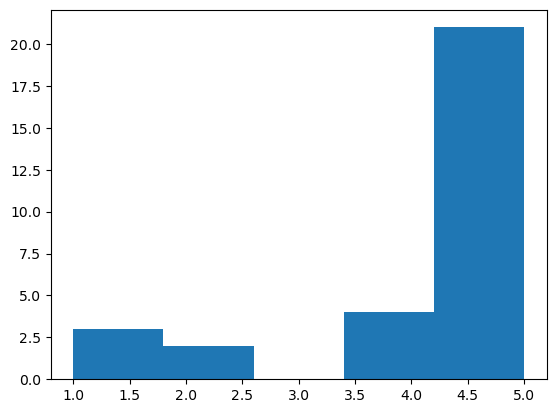

Score
1     3
2     2
4     4
5    21
Name: Id, dtype: int64


In [7]:
reviews=df
reviews.dropna(inplace=True)
reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

In [10]:
score_1 = reviews[reviews['Score'] == 1].sample(n=min(9, len(reviews[reviews['Score'] == 1])), replace=False)
score_2 = reviews[reviews['Score'] == 2].sample(n=min(9, len(reviews[reviews['Score'] == 2])), replace=False)
score_3 = reviews[reviews['Score'] == 3].sample(n=min(9, len(reviews[reviews['Score'] == 3])), replace=False)
score_4 = reviews[reviews['Score'] == 4].sample(n=min(9, len(reviews[reviews['Score'] == 4])), replace=False)
score_5 = reviews[reviews['Score'] == 5].sample(n=min(9, len(reviews[reviews['Score'] == 5])), replace=False)


In [11]:
reviews_sample = pd.concat([score_1, score_2, score_3, score_4, score_5], axis=0)
reviews_sample.reset_index(drop=True, inplace=True)

print(reviews_sample.groupby('Score').count().Id)


Score
1    3
2    2
4    4
5    9
Name: Id, dtype: int64


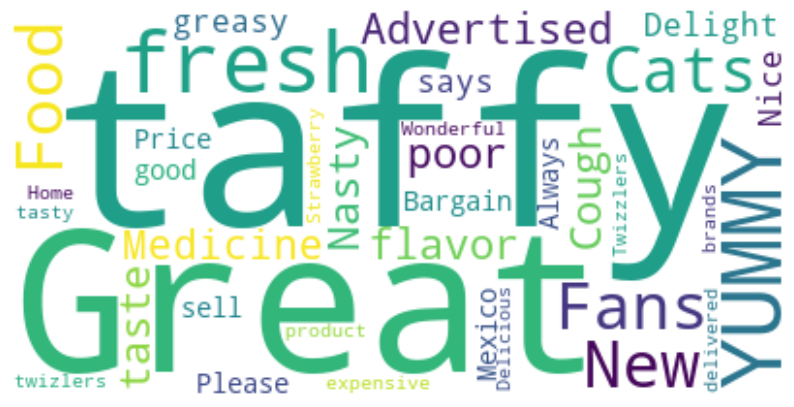

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all summaries into a single string
reviews_str = " ".join(reviews_sample["Summary"].to_numpy())

# Generate word cloud
wordcloud = WordCloud(background_color='white').generate(reviews_str)

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()